part b :


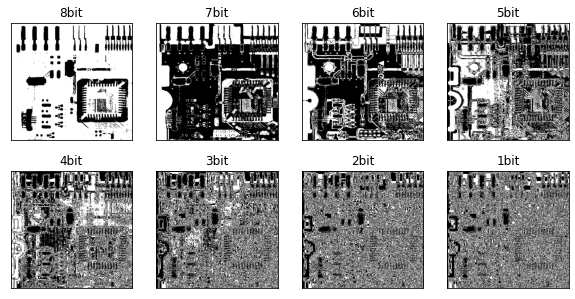

part c :


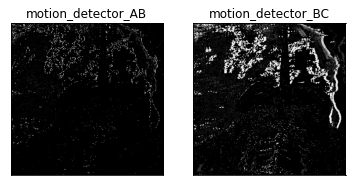

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/PCB.tif',0)

# a ) ------------------------------------------------------------------------


def bitplane_slice(img,n):
  lst = []
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          lst.append(np.binary_repr(img[i][j] ,width=8))
                                                              
  result = (np.array([int(i[8-n]) for i in lst],dtype = np.uint8)).reshape(img.shape[0],img.shape[1])
  return result

# b ) ------------------------------------------------------------------------

print('part b :')
plt.figure(figsize=(10,5))
plt.subplot(241),plt.imshow(bitplane_slice(img,8), cmap='gray', vmin = 0 , vmax = 1),plt.title('8bit')
plt.subplot(242),plt.imshow(bitplane_slice(img,7), cmap='gray', vmin = 0 , vmax = 1),plt.title('7bit')
plt.subplot(243),plt.imshow(bitplane_slice(img,6), cmap='gray', vmin = 0 , vmax = 1),plt.title('6bit')
plt.subplot(244),plt.imshow(bitplane_slice(img,5), cmap='gray', vmin = 0 , vmax = 1),plt.title('5bit')
plt.subplot(245),plt.imshow(bitplane_slice(img,4), cmap='gray', vmin = 0 , vmax = 1),plt.title('4bit')
plt.subplot(246),plt.imshow(bitplane_slice(img,3), cmap='gray', vmin = 0 , vmax = 1),plt.title('3bit')
plt.subplot(247),plt.imshow(bitplane_slice(img,2), cmap='gray', vmin = 0 , vmax = 1),plt.title('2bit')
plt.subplot(248),plt.imshow(bitplane_slice(img,1), cmap='gray', vmin = 0 , vmax = 1),plt.title('1bit')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()


# C) ------------------------------------------------------------------
print('part c :')

NASA_A = cv2.imread('/content/NASA-A.tif',0);
NASA_B = cv2.imread('/content/NASA-B.tif',0);
NASA_C = cv2.imread('/content/NASA-C.tif',0);

# NASA_A and NASA_B :

A_xor_B_bit8 = cv2.bitwise_xor(bitplane_slice(NASA_A,8), bitplane_slice(NASA_B,8), mask = None)  
A_xor_B_bit7 = cv2.bitwise_xor(bitplane_slice(NASA_A,7), bitplane_slice(NASA_B,7), mask = None) 
A_xor_B_bit6 = cv2.bitwise_xor(bitplane_slice(NASA_A,6), bitplane_slice(NASA_B,6), mask = None) 
A_xor_B_bit5 = cv2.bitwise_xor(bitplane_slice(NASA_A,5), bitplane_slice(NASA_B,5), mask = None) 

motion_detector_AB = 128*A_xor_B_bit8 + 64*A_xor_B_bit7 + 32*A_xor_B_bit6 + 16*A_xor_B_bit5

# NASA_C and NASA_B :

C_xor_B_bit8 = cv2.bitwise_xor(bitplane_slice(NASA_C,8), bitplane_slice(NASA_B,8), mask = None) 
C_xor_B_bit7 = cv2.bitwise_xor(bitplane_slice(NASA_C,7), bitplane_slice(NASA_B,7), mask = None) 
C_xor_B_bit6 = cv2.bitwise_xor(bitplane_slice(NASA_C,6), bitplane_slice(NASA_B,6), mask = None) 
C_xor_B_bit5 = cv2.bitwise_xor(bitplane_slice(NASA_C,5), bitplane_slice(NASA_B,5), mask = None) 

motion_detector_BC = 128*C_xor_B_bit8 + 64*C_xor_B_bit7 + 32*C_xor_B_bit6 + 16*C_xor_B_bit5
#motion_detector_BC = C_xor_B_bit8* 128 + C_xor_B_bit7 * 64+ C_xor_B_bit6 * 32+ C_xor_B_bit5 * 16

plt.figure()
plt.subplot(121),plt.imshow(motion_detector_AB,cmap='gray', vmin = 0 , vmax = 255),plt.title('motion_detector_AB')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(motion_detector_BC,cmap='gray', vmin = 0 , vmax = 255),plt.title('motion_detector_BC')
plt.xticks([]), plt.yticks([])
plt.show()